In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
import os
os.chdir('/Users/njafarov/Downloads')

### All techniques of handling missing values 

1. Mean/Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

## 1. Mean/Median/Mode replacement

Assumption: Data are missing completely at random (MCAR). 
We solve it by replacing the NAN with the most frequent accurance of the variables

In [9]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare', '2urvived'])
df = df.rename(columns={'2urvived':'Survived'})

In [10]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [11]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [12]:
def inpute_nan(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)

In [39]:
median = df['Age'].median()
inpute_nan(df, 'Age', median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


After replacement we have to check whether the standart deviation of both variables is different or not

In [14]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [15]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax) 
df.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()

#### Advantages and Disatvantages of Mean/Median Imputation

#### Advabtages
1. Easy to implement (Robust to outliers)
2. Faster way to obtrain complete dataset

#### Disadvabtages
1. Change or Distortion in the original variabce
2. Impacts Correlation

## 2. Rample Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values.

Assumpation: The data are missing completely at random (MCAR)

In [32]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [30]:
df.isnull().mean()
def impute_nan(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random']=random_sample
   

In [37]:
impute_nan(df, 'Age', median)


In [38]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


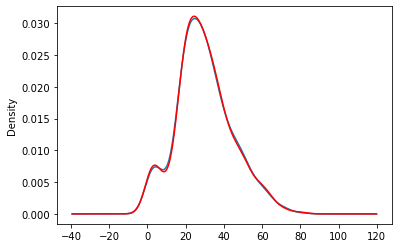

In [40]:
fig = plt.figure() 
ax1 = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax1) 
df.Age_random.plot(kind='kde', ax=ax1, color='red') 
lines, labels = ax1.get_legend_handles_labels()

#### Advantages and Disatvantages of Random Sampling Imputation

#### Advabtages
1. Easy to implement (Robust to outliers)
2. Less Distortion in the original variabce

#### Disadvabtages
1. In every situation randomness wont work

## 3. Capturing NAN values with a new feature

Assumption: Data is missing not at random (MNAR)

In [41]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [42]:
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

## 4. End of Distribution Imputation

Assumption: Data is missing not at random (MNAR)

In [43]:
def impute_nan(df, variable, extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)

<AxesSubplot:xlabel='Age'>

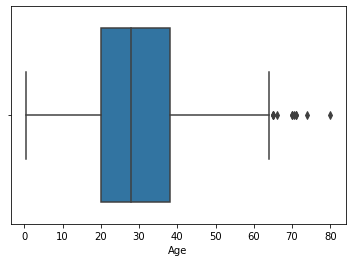

In [44]:
extreme = df['Age'].mean()+3*df['Age'].std()
impute_nan(df, 'Age', extreme)
sns.boxplot(x='Age', data=df)

<AxesSubplot:>

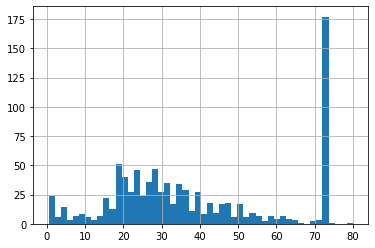

In [45]:
df['Age_end_distribution'].hist(bins=50)

<AxesSubplot:xlabel='Age_end_distribution'>

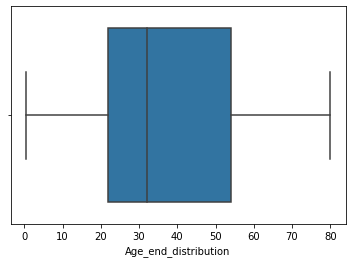

In [46]:
sns.boxplot(x='Age_end_distribution', data=df)

#### Advantages and Disatvantages of End of Distribution Imputation

#### Advabtages
1. Easy to implement (Robust to outliers)
2. Captures the importance of missingness if there is one

#### Disadvabtages
1. Distorts the original distribution of the variable
2. If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution
3. If the number of NA is big, it will mask true outliers in the distribution
4. If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent feature engineering